### Step 1. Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Step 2. Training Data Generation

In [2]:
# Number of observations (1000, 10.000, 100.000 etc.)
observations = 1000

# Input generation for y = 2x - 3z + 5 equation 
xs = np.random.uniform(-10, 10, (observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
generated_inputs = np.column_stack((xs, zs))

# Sure make some noise for modelling a real-life signal. Keep it small.
noise = np.random.uniform(-1, 1, (observations, 1))

# Define the target model
generated_targets = 2*xs - 3*zs + 5 + noise

# Save the data as a TF-compatible extension file
np.savez('TF_basics_training', inputs = generated_inputs, targets = generated_targets)

### Step 3. Solve with TensorFlow

In [3]:
# Load the file you saved
training_data = np.load('TF_basics_training.npz')

In [4]:
# Declare input (weights) and ouput matrix sizes
input_size = 2
output_size = 1

# Construct the model with TF
# Lay out the model in 'Sequential'
# Dense method applies dot product of inputs & weight plus biases and gives the output
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

In [5]:
# Now it's time to define the objective function (aka "loss function" for supervised learning)
# and optimization algorithm called "optimizer" in TF
# SGD stands for Stochastic Gradient Descent which is the most commonly used iterative optimization algorithm 
# for minimizing the loss function
# Mean Squared Error Function which is scaled by number of observations
# computes the mean of squares of errors between labels and predictions
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [6]:
# Fit the model indicating the inputs and targets
# Epochs means the number of iterations you want to choose
# Verbose parameter defines the type of displaying outputs (type 2 shows a simple result for each iteration)
model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 24.7222
Epoch 2/100
32/32 - 0s - loss: 4.3117
Epoch 3/100
32/32 - 0s - loss: 1.4394
Epoch 4/100
32/32 - 0s - loss: 0.6490
Epoch 5/100
32/32 - 0s - loss: 0.4372
Epoch 6/100
32/32 - 0s - loss: 0.3656
Epoch 7/100
32/32 - 0s - loss: 0.3548
Epoch 8/100
32/32 - 0s - loss: 0.3482
Epoch 9/100
32/32 - 0s - loss: 0.3493
Epoch 10/100
32/32 - 0s - loss: 0.3352
Epoch 11/100
32/32 - 0s - loss: 0.3408
Epoch 12/100
32/32 - 0s - loss: 0.3443
Epoch 13/100
32/32 - 0s - loss: 0.3494
Epoch 14/100
32/32 - 0s - loss: 0.3378
Epoch 15/100
32/32 - 0s - loss: 0.3451
Epoch 16/100
32/32 - 0s - loss: 0.3457
Epoch 17/100
32/32 - 0s - loss: 0.3413
Epoch 18/100
32/32 - 0s - loss: 0.3482
Epoch 19/100
32/32 - 0s - loss: 0.3441
Epoch 20/100
32/32 - 0s - loss: 0.3406
Epoch 21/100
32/32 - 0s - loss: 0.3594
Epoch 22/100
32/32 - 0s - loss: 0.3496
Epoch 23/100
32/32 - 0s - loss: 0.3489
Epoch 24/100
32/32 - 0s - loss: 0.3494
Epoch 25/100
32/32 - 0s - loss: 0.3406
Epoch 26/100
32/32 - 0s - loss: 0

### Step 4. Extract the Weights and Biases
Extracting the weight(s) and bias(es) of a model is not an essential step for the machine learning process. In fact, usually they would not tell much in a deep learning context. However, this simple example was set up in a way, allowing to verify if the answers are correct.

In [7]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

# The reason to take the layers[0] is to have only one layer in this example of ML.

In [8]:
print(weights)

[[ 2.0029466]
 [-2.974366 ]]


In [9]:
print(bias)

[4.9632406]


### Step 5. Make Predictions
After train the model, you should generate a new dataset to test the model.

In [10]:
x_test = np.random.uniform(low=-10, high=10, size=(observations,1))
z_test = np.random.uniform(-10, 10, (observations,1))
test_inputs = np.column_stack((x_test, z_test))
t_noise = np.random.uniform(-1, 1, (observations, 1))
test_targets = 2*x_test - 3*z_test + 5 + t_noise
np.savez('TF_basics_test', inputs = test_inputs, targets = test_targets)
test_data = np.load('TF_basics_test.npz')

# Try the model on the test data with predict_on_batch method
model.predict_on_batch(test_data['inputs']).round(1)

array([[-10. ],
       [ -3.4],
       [ 12.7],
       [ 31.3],
       [  6. ],
       [ 17.9],
       [ 16. ],
       [-15.8],
       [ 51.2],
       [ -3.9],
       [-13.1],
       [ -4.9],
       [ 13.5],
       [  2.4],
       [ 16.9],
       [ -0.2],
       [ 17. ],
       [  5.2],
       [ 19.2],
       [ 12.7],
       [  4.5],
       [ -9.8],
       [ 13.8],
       [ 48.7],
       [  1.1],
       [-17.3],
       [ 22.5],
       [ 36.3],
       [ 12.2],
       [-17.9],
       [ -2.4],
       [ 20.9],
       [ -9.8],
       [-28.9],
       [ -1.6],
       [ -0.4],
       [  7. ],
       [-31.8],
       [  7.5],
       [ 14.9],
       [  6.5],
       [-17.4],
       [  7.6],
       [-12.9],
       [-15.4],
       [-26.1],
       [ 38.1],
       [ 17.1],
       [-11.1],
       [ -8.3],
       [ 12.7],
       [ 10.9],
       [ -9.1],
       [ -3.7],
       [  9. ],
       [-18.9],
       [ -4.9],
       [-25.5],
       [-14.7],
       [ -7.9],
       [ -6.6],
       [ 21.8],
       [

In [11]:
# Manually compare the test targets to the test inputs
test_data['targets'].round(1)

array([[ -9.2],
       [ -3.8],
       [ 13.1],
       [ 31.1],
       [  5.4],
       [ 17.6],
       [ 16.9],
       [-15.3],
       [ 51.6],
       [ -4.5],
       [-14. ],
       [ -5.4],
       [ 13.4],
       [  1.7],
       [ 17.8],
       [ -0.9],
       [ 17.2],
       [  4.4],
       [ 20.2],
       [ 12.6],
       [  4.5],
       [-10.6],
       [ 14.8],
       [ 48.7],
       [  0.7],
       [-16.6],
       [ 22.1],
       [ 36.5],
       [ 12.5],
       [-17.8],
       [ -2.6],
       [ 21.3],
       [-10. ],
       [-28.5],
       [ -2.1],
       [  0.5],
       [  6.2],
       [-32.7],
       [  6.6],
       [ 14.2],
       [  7.5],
       [-16.8],
       [  6.8],
       [-13.4],
       [-15.2],
       [-27.1],
       [ 37.4],
       [ 18.1],
       [-10.2],
       [ -8. ],
       [ 12.9],
       [ 11.8],
       [ -8.8],
       [ -3.5],
       [  9.7],
       [-18.7],
       [ -4.4],
       [-26.3],
       [-14.8],
       [ -7.6],
       [ -7. ],
       [ 22.3],
       [

### Step 6. Plot the Data

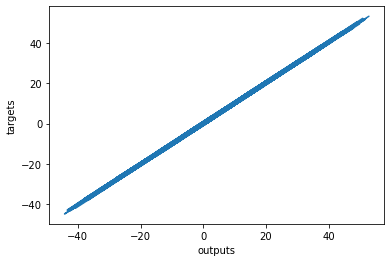

In [12]:
# The model is optimized, so the outputs are calculated based on the last form of the model
# You have to np.squeeze the arrays in order to fit them to what the plot function expects
plt.plot(np.squeeze(model.predict_on_batch(test_data['inputs'])), np.squeeze(test_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()